# Fonctions de probabilité de densité et coefficients de correlation comme outils d'analyse et de classification automatique des mélodies

Anas GHRAB - http://anas.ghrab.tn

Institut Supérieur de Musique - Université de Sousse (Tunisie)<br>
Centre des Musiques Arabes et Méditerranéennes

# Introduction

Un des objectifs de l'analyse de la musique modale est la comparaison des mélodies, ce qui implique, progressivement, leur classification. Alors que les méthodes classiques d'analyse permettent de saisir les spécifités modales sur un ensemble délimité, et dont le nombre est généralement réduit, nous savons que la pertinance des résultats est en étroite relation avec la quantité de données analysées.

Nous proposons ici une méthode générale pour la mesure de la proximité mélodique applicable à une base de données sonores; ainsi, nous montrons ici l'utilié de cette approche aussi bien dans l'analyse d'un _taqsīm_ instrumental ou d'une _qaṣīda_ vocale que dans un ensemble complexe de chants traditionnels, ou les méthodes classiques d'analyse sont peu efficaces.

Plan :

* L'échelle musicale représentée par une fonction de probabilité de densité des fréquences : ex. une phrase mélodique de ʿAlī al-Barrāq
* La comparaison des fonctions de probabilités : coefficient de corrélation
* Généralisation à plusieurs fichiers

Nous avons implémenté l'ensemble des approches présentées ici dans le module **Diastema** qui fonctionne sous Python. Ce module est téléchargeable à partir de l'adresse : https://github.com/AnasGhrab/diastema. Nous incluons ici toutes les commandes nécessaires à l'utilisation du module.

In [1]:
%matplotlib inline
from diastema import *
from IPython.display import Audio

# L'échelle musicale représentée par une fonction de probabilité de densité des fréquences

## La mélodie comme liste de fréquences

On sait, au moins depuis les travaux de Charles Seeger (1886 – 1979) sur le mélographe, qu'il est musicologiquement plus pertinant de représenter une mélodie par une courbe fréquencielle qu'en utilisant une notation symbolique (voir fig. 1).

In [2]:
from IPython.display import Image

Image(url='http://localhost/images/melograph.jpg')

In [3]:
Image(url='http://localhost/images/seegermelo.jpg')

Les données fréquencielles d'une mélodie peuvent être obtenues aujourd'hui par l'analyse computationnelle de la fondamentale d'un enregistrement sonore numérique. Plusieurs algorithmes et implémentations existent : l'algorithme de Praat (Paul Boersma : _Accurate short-term analysis of the fundamental frequency and the harmonics-to-noise ratio of a sampled sound._ IFA Proceedings 17(1993): 97-110.), Yin (ref), etc. Nous utiliserons ici l'algorithme **Melodia** implémenté dans Essentia par la méthode PredominentMelody() (ref).

Prenons comme exemple le _taqsīm bayātī_ de ʿAlī Barrāq (enregistrement publié dans le CD accompagnant l'ouvrage : Manoubi Snoussi, _Initiation à la Musique Tunisienne_, CMAM, ...), segmenté manuellement en six phrases :

In [4]:
dossier = "/Users/anas/AUDIO/Barraq/"
Barraq = Melodies(dossier,100,450)

Lecture et analyse de  7  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/Barraq/


On peut représenter par exemple la courbe mélodique de la première phrase :

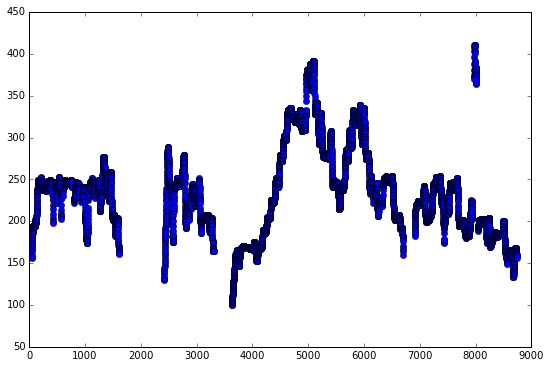

In [5]:
Y = Barraq.melodies[1].frequences # La numérotation des mélodies commence à zéro
plt.figure(figsize=(9,6))
plt.plot(Y,'o')

In [6]:
Audio(filename="/Users/anas/AUDIO/Barraq/P1.wav")

Analyser la courbe revient à analyser les données numériques de la courbe.

In [7]:
Y = Barraq.melodies[1].freq
print Y[0:50]

[ 155.564  157.372  160.123  163.866  166.73   168.667  171.616  173.61
  175.627  177.668  179.732  180.773  182.874  184.999  186.07   188.232
  189.323  189.323  191.523  192.632  193.748  193.748  194.87   194.87
  194.87   194.87   194.87   194.87   193.748  193.748  192.632  192.632
  193.748  193.748  194.87   194.87   195.999  195.999  195.999  195.999
  194.87   194.87   194.87   194.87   194.87   194.87   194.87   194.87
  194.87   194.87 ]


## Fonction de probabilité de densité et pôles fréquentiels

Une des méthodes permettant d'analyser la densité des fréquences dans les données est l'estimation de la densité par noyaux gaussiens (_Kernel Density Estimation_ : http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html; nous utiliserons ici un bw_method=.1). Cette méthode nous permet d'avoir une fonction de densité de probabilité (_Probability Density Estimation_). Appliquée à la première phrase, nous obtenons la représentation suivante :

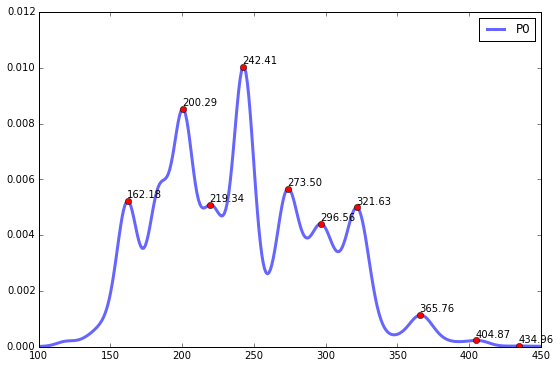

In [8]:
plt.figure(figsize=(9,6))
Barraq.melodies[0].pdf_show()

Nous pouvons lire sur le graphe que la fréquence dont l'appaarition est la plus probable dans un pareil extrait, c'est la fréquence 242 Hz. Ensuite, avec une moindre probabilité, la fréquence 200 Hz, etc. Il est possible d'obtenir tous les pics représentés par la commande :

In [9]:
Barraq.melodies[0].peaks

array([ 162.1777,  200.2865,  219.341 ,  242.4069,  273.4957,  296.5616,
        321.6332,  365.7593,  404.8711,  434.957 ])

Les probabilités de ces pics sont :

In [10]:
Barraq.melodies[0].peakspdf

array([  5.2252e-03,   8.5358e-03,   5.0912e-03,   1.0044e-02,
         5.6737e-03,   4.4165e-03,   4.9976e-03,   1.1381e-03,
         2.2812e-04,   2.8166e-05])

## Comparaison des fonctions de densité de probabilité

Nous pouvons généraliser la procédure et placer sur un même graphe les fonctions de densités de probabilités relatives aux fréquences des quatre phrases musicales :

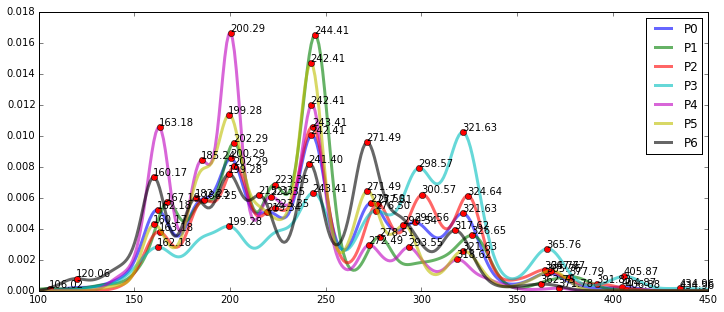

In [11]:
plt.figure(figsize=(12,5))
Barraq.PdfsPlot()

Plusieurs informations musicologiques peuvent êtes lus sur ce graphe. Nous pouvons voir que la plupart des courbes partagent les mêmes pôles fréquenciels que la totalité de l'extrait (_P0_). Nous pouvons voir aussi que la première phrase (_P1_) appuie principalement la fréquence dominante 244 Hz; celle-ci, avec de légères variations, constitue la fréquence la plus présente dans la plupart des extraits.

Nous pouvons peut lire également que la troisième phrase (P3) appuie, encore plus que la deuxième phrase,  les pôles fréquenciels aïgus, alors que la quatrième phrase appuie particulièrement la fréquence 200 Hz.

Une méthode mathématique permettant d'analyser la proximité des courbes est le calcul des _coefficient de corrélation_ (http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html), ce qui nous donne les valeurs suivantes :

In [12]:
Barraq.PdfCorr

array([[ 1.    ,  0.8945,  0.9698,  0.7143,  0.8769,  0.946 ,  0.9093],
       [ 0.8945,  1.    ,  0.8782,  0.4979,  0.8524,  0.913 ,  0.7122],
       [ 0.9698,  0.8782,  1.    ,  0.7984,  0.7916,  0.8906,  0.8133],
       [ 0.7143,  0.4979,  0.7984,  1.    ,  0.377 ,  0.5059,  0.5774],
       [ 0.8769,  0.8524,  0.7916,  0.377 ,  1.    ,  0.9005,  0.7847],
       [ 0.946 ,  0.913 ,  0.8906,  0.5059,  0.9005,  1.    ,  0.859 ],
       [ 0.9093,  0.7122,  0.8133,  0.5774,  0.7847,  0.859 ,  1.    ]])

On peut représenter ces coefficients sous la forme d'une matrice de similarité (_self-similarity matrix_), qui nous renseigne plus facilement sur la proximité entre les extraits :

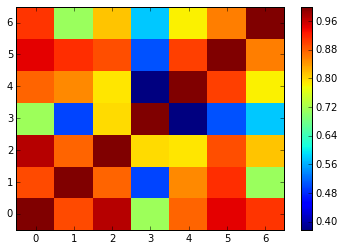

In [13]:
Barraq.Simatrix()

Ainsi, on peut lire que la proximité la plus élevée se trouve entre l'extrait et lui-même : 0 à 0, 1 à 1, 2 à 2, etc., (coeficient égale à 1). On peut directement lire également que les extraits les plus proches de la totalité du chant (P0) sont les extraits 2, 5 et 6 ayant respectivement les coefficients de corrélation 0.9697, 0.9459 et 0.9093. L'extrait le plus éloigné étant la phrase 3, avec un coefficient de 0.71426501. Cependant, cette valeur demeure élevée -- nous sommes encore relativement éloigné de la valeur 0--, ce qui montre que toutes les phrases partagent les mêmes pôles fréquenciels : nous n'avons pas de modulation dans ce chant.

## Analyse du contenu intervallique

### Détection de la tonique

On peut obtenir la tonique en la définissant comme étant la fréquence qui a la probabilité la plus élevée dans la dernière partie de la phrase (_method=pdf_). Comparons ici les valeurs obtenues en considérant différents pourcentages des dernières fréquences présentes dans les différentes phrases (0.5%, 1%, 1.5%, 2%, 5%, 10%, 15%) :

In [14]:
for i in range(0,len(Barraq.melodies)):
    toniques = []
    for j in [0.5,1,1.5,2,5,10,15]:
        toniques.append(Barraq.melodies[i].tonique(j,method="pdf")[1])
    print "Toniques possibles de la phrase ",i," : ", toniques

Toniques possibles de la phrase  0  :  [163, 162, 162, 181, 187, 195, 198]
Toniques possibles de la phrase  1  :  [166, 163, 162, 163, 184, 185, 189]
Toniques possibles de la phrase  2  :  [156, 157, 158, 158, 183, 184, 186]
Toniques possibles de la phrase  3  :  [312, 308, 184, 183, 186, 189, 194]
Toniques possibles de la phrase  4  :  [158, 158, 159, 158, 183, 197, 198]
Toniques possibles de la phrase  5  :  [158, 158, 157, 157, 183, 186, 189]
Toniques possibles de la phrase  6  :  [163, 162, 162, 162, 162, 184, 186]


Il est possible de définir la tonique comme étant la fréquence la plus présente parmi les dernières fréquences (_method="mode"_) :

In [15]:
for i in range(0,len(Barraq.melodies)):
    toniques = []
    for j in [0.5,1,1.5,2,5,10,15]:
        toniques.append(int(Barraq.melodies[i].tonique(j,method="mode")[1]))
    print "Toniques possibles de la phrase ",i," : ", toniques

Toniques possibles de la phrase  0  :  [162, 162, 180, 180, 180, 158, 269]
Toniques possibles de la phrase  1  :  [167, 167, 162, 163, 184, 184, 183]
Toniques possibles de la phrase  2  :  [156, 158, 158, 158, 184, 245, 183]
Toniques possibles de la phrase  3  :  [312, 312, 312, 182, 182, 182, 182]
Toniques possibles de la phrase  4  :  [159, 159, 159, 157, 181, 197, 239]
Toniques possibles de la phrase  5  :  [158, 158, 158, 158, 181, 181, 244]
Toniques possibles de la phrase  6  :  [162, 162, 162, 162, 162, 180, 180]


Les deux méthodes s'accordent globalement dans les résultats obtenus entre 0.5% et 1% dernières fréquences de la phrase. La fréquence 162-193 Hz est la tonique de tout le chant. Nous remarquons que cette tonique baisse dans les deuxième, quatrième et cinquième phrases [La fréquence de la tonique 312 indiquées pour la troisième phrase correspond à l'octave supérieur par rapport à la fréquence 156 Hz. Ceci est dû à la détection de la fréquence fondamentale par l'algorithme de détection f0.].

### Tonique et fréquence dominante : intervalle dominant

Dans un contexte modal, l'intervalle formé par la note-fréquence dominante et la tonique est un intervalle fondamental. Observons sa variation par rapport aux différentes phrases :

In [16]:
TD = []
for i in range(0,len(Barraq.melodies)):
    tonique = Barraq.melodies[i].tonique(.5,method="mode")[1]
    peakidx = numpy.argmax(Barraq.melodies[i].peakspdf)
    dominante = Barraq.melodies[i].peaks[peakidx]
    TD.append([dominante,tonique])
numpy.array(TD)

array([[ 242.4069,  162.922 ],
       [ 244.4126,  167.696 ],
       [ 243.4097,  156.466 ],
       [ 321.6332,  312.932 ],
       [ 200.2865,  159.201 ],
       [ 242.4069,  158.284 ],
       [ 271.49  ,  162.922 ]])

Pour une lecture comparative de ces valeurs ils seraient plus judicieux de les convertir sur une échelle linéaire; soit en savarts :

In [17]:
for i in range(0,len(TD)):
    I = numpy.float32(log10(TD[i][0]/TD[i][1])*1000)
    print "Intervalle fondamental de la phrase", i," : ", I, "savarts"

Intervalle fondamental de la phrase 0  :  172.565 savarts
Intervalle fondamental de la phrase 1  :  163.601 savarts
Intervalle fondamental de la phrase 2  :  191.918 savarts
Intervalle fondamental de la phrase 3  :  11.9109 savarts
Intervalle fondamental de la phrase 4  :  99.706 savarts
Intervalle fondamental de la phrase 5  :  185.108 savarts
Intervalle fondamental de la phrase 6  :  221.774 savarts


Rappelons la valeur des intervalles fondamentaux en savarts :

In [18]:
from diastema import epimores
epi(list="Yes");

2/1*4/3  ::  425.969 s.
4/3  ::  124.939 s.
12/11  ::  37.7886 s.
1/1  ::  0.0 s.
6/5  ::  79.1812 s.
3/2*6/5  ::  255.273 s.
9/8*12/11  ::  88.9411 s.
3/2*5/4  ::  273.001 s.
2/1*12/11  ::  338.819 s.
3/2*9/8  ::  227.244 s.
2/1*9/8  ::  352.183 s.
2/1*6/5  ::  380.211 s.
3/2  ::  176.091 s.
5/4  ::  96.91 s.
3/2*10/9  ::  221.849 s.
2/1  ::  301.03 s.
10/9  ::  45.7575 s.
2/1*10/9  ::  346.787 s.
9/8  ::  51.1525 s.
2/1*5/4  ::  397.94 s.


Nous pouvons voir que dans la plupart des phrases, l'intervalle fondamental est une quinte, dont la valeur est très variable. La phrase P4 s'appuie sur une tierce 5/4 et la dernière phrase sur une sixte.

### Échelle par rapport à la tonique

In [19]:
Barraq.melodies[0].get_intervals()

array([ 172.5652,   89.672 ,  224.9708,   -1.9887,  129.14  ,  295.3812,
        260.1352,  351.2157,  395.337 ,  426.4666])

### Échelles de plusieurs extraits

In [20]:
Barraq.Intervals()

[array([ 172.5652,   89.672 ,  224.9708,   -1.9887,  129.14  ,  295.3812,
         260.1352,  351.2157,  395.337 ,  426.4666]),
 array([ 163.6009,   81.4566,  124.468 ,   -1.3073,  289.5567,  220.3181,
         352.732 , -199.1464,  384.9402]),
 array([ 191.918 ,  111.5593,  283.5301,  316.9845,   75.6679,  248.8542,
         154.5707,   18.2483,  367.583 ,  398.6819]),
 array([  11.9109,  -20.4077, -109.112 ,  -53.7481, -195.9783, -285.459 ,
          67.7454,  112.9412,  142.9964]),
 array([  99.706 ,  182.5991,   10.7225,   65.7973,  143.1273,  233.4093,
         265.7407,  301.3336,  368.3361]),
 array([ 185.1079,  100.0347,  234.3168,    5.1494,  263.7755,  307.9239,
         366.1334]),
 array([ 221.7741,  170.7647,   87.492 ,   -7.3934,  121.1238,   48.652 ,
         289.9305, -132.5911,  347.6285])]

## Une fonction de probabilité de densité comme échelle générale

Afin de constituer une échelle générale du chant, nous pourrions définir une fonction de probabilité de densité comme étant la somme des différentes fonctions. Nous pouvons comparer cette fonction à celle obtenu par la totalite du chant, P0 :

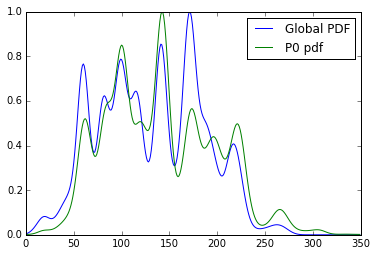

In [21]:
PDF = []
for i in range(1,len(Barraq.melodies)):
    PDF =+ Barraq.melodies[i].pdf

PDF_norm = PDF*1/max(PDF)
P0_norm = Barraq.melodies[0].pdf*(1/max(Barraq.melodies[0].pdf))
plt.plot(PDF_norm, label="Global PDF")
plt.plot(P0_norm, label="P0 pdf")
plt.legend()

Nous remarquons que la PDF globale, somme de toutes les fonctions de densité de probabilité : comme elle prend en considération les différentes variations de la tonique selon les phrases, les pôles fréquenciels se trouvent affirmés. C'est donc cette fonction que nous prendrons en considération pour la détermination de l'échelle globale. Ses pics peuvent être obtenus comme suit :

In [22]:
P = ((numpy.diff(numpy.sign(numpy.diff(PDF))) < 0).nonzero()[0] + 1)+100 # local max
P

array([120, 160, 182, 199, 215, 241, 271, 317, 362])

Ainsi, **l'échelle musicale de tout le chant, en savarts** peut donc être représentée par les intervalles :

In [23]:
Echelle = []
for i in range(0,len(P)):
    Echelle.append(log10(P[i]/160.)*1000) # 160 Hz étant la tonique

La méthode _Intervs()_ nous permet de comparer contenu de cette échelle en comparant les intervalles en savarts aux valeurs des intervalles de références :

In [24]:
Inters(Echelle)

[['-124.94', '4/3', '-', '0.00'],
 ['0.00', '1/1', '+', '0.00'],
 ['55.95', '9/8', '+', '4.80'],
 ['94.73', '5/4', '-', '2.18'],
 ['128.32', '4/3', '+', '3.38'],
 ['177.90', '3/2', '+', '1.81'],
 ['228.85', '3/2*9/8', '+', '1.61'],
 ['296.94', '2/1', '-', '4.09'],
 ['354.59', '2/1*9/8', '+', '2.41']]

Ainsi, selon cette approche, dans ce chant ʿAlī al-Barrāq, la quarte au dessous de la tonique est très exacte. Le ton est un peu large (plus grave que le ton 9/8 de 4.8 savarts). C'est l'intervalle le plus éloigné de l'intervalle de référence. Sachant que l'intervalle épimore le plus proche de cet écart est l'intervalle 91/90, lui-même plus petit qu'un comma syntonique (81/80), on peut dire que ces intervalles représentent de manière assez précise l'échelle globale utilisée dans ce chant.

## Conclusion

Nous venons de voir comment il est possible d'utiliser certains concepts statistiques et musicologiques, que nous avons implémentés dans le module Python Diastema, afin de développer une méthode d'analyse des intervalles mélodiques. L'avantage de cette méthode est de pouvoir comparer de manière relativement objective et rapide un ensemble de mélodies, sur la base de leur échelle. Étant donnée que l'échelle est conçu comme une probabilité de présence des fréquences, les pics de de la courbe donnée par les différentes fonctions nous renseignent sur les pôles fréquenciels présents dans la mélodie.
Pour une appréciation de ce contenu fréquentiels, il est nécessaire de retourner à des concepts musicologiques, comme la tonique. Nous avons vu que les résultats peuvent varier selon les paramètres utilisés pour la détection de la fréquence représentative de la tonique d'une phrase.
Finalement, l'échelle globale d'une mélodie segmentée peut-être obtenue à partir de la somme des fonctions des densités de probabilité.